Feature Engineering is about addressing some challenges when working with datasets. Some common ones are - 
1. From a large dataset, which features to use and which to avoid.
2. Dealing with correlated features which does not present any useful information.
3. Some feature might not be related to the outcome feature at all.
4. Some might not be in the correct format like some ML Algorithms don't work with categorical text so need to encode those before using them.

Now the question to ask is, where does the Feature Engineering fit within the Machine Learning Workflow. Often we use it in the middle of `Exploratory Data Analysis and implementing Machine Learning algorithms`. 

Broadly there are three categories of Feature Engineering:
1. Feature Transformation Methods - Scaling, Binning, Encodings etc
2. Dimensionality Reduction Methods - PCA, LDA etc.
3. Feature Selection Methods
    - Filter Method.
    - Wrapper Method.
    - Embedded Method.

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## <font color = 'Maroon'>Data Transformations

### <font color = 'Blue'>1. Numerical Transformations

#### <font color = 'Green'>1.1. Centering the Data

It involves subtracting the mean of the data from each data point so that new mean is 0. This is done to easily understand how far the data points are from the mean.

In [3]:
data = pd.read_excel('diabetes.xlsx')

In [4]:
data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
age = data['Age']

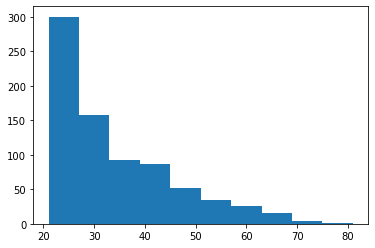

In [8]:
plt.hist(age)
plt.show()

In [6]:
age_mean = np.mean(age)

In [7]:
age_centered = age - age_mean

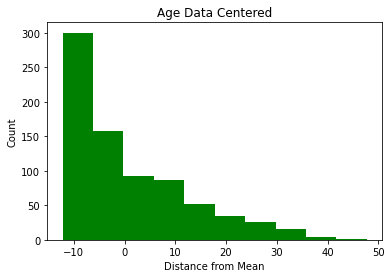

In [11]:
plt.hist(age_centered, color = 'g')
plt.title('Age Data Centered')
plt.xlabel('Distance from Mean')
plt.ylabel('Count')
plt.show()

#### <font color = 'Green'>1.2 Standardizing the Data

Standardization also known as Z-Score Normalization is where we change the mean of the dataset to 0 and Standard Deviation to 1. It will be a very important task before:
- Principal Component Analysis
- Using any clustering or distance based algorithm (think KMeans or DBSCAN)
- KNN
- Performing regularization methods like LASSO and Ridge

This is done to bring complete data on similar scale and hence get robust model performance overall.

In [12]:
#One way to standardize is this
std_dev_age = np.std(age)

## standardize ages
age_standardized = (age - age_mean)/std_dev_age

In [20]:
print(np.mean(age_standardized))
print(np.std(age_standardized))

2.1929795942140137e-16
1.0000000000000007


In [13]:
scaler = StandardScaler()

age_reshaped = np.array(age).reshape(-1, 1)
age_scaled = scaler.fit_transform(age_reshaped)

In [19]:
print(np.mean(age_scaled))
print(np.std(age_scaled))

1.9313254699208451e-16
1.0


#### <font color = 'Green'>1.3 Min-Max Normalization

This is another form of scaling the data where scale the dataset to be between 0 and 1. But it does not work well with the data which has extreme outliers. So we should this process only when the difference between minimum and maximum is not too drastic.

In [24]:
data['Age'].max()

81

In [25]:
data['Age'].min()

21

In [26]:
#first approach of min max scaling
age_max = np.max(age)

#find the min spent
age_min = np.min(age)

#find the difference
age_range = age_max - age_min

#normalize your spent feature
age_normalized = (age - age_min)/(age_max - age_min)

In [30]:
#Second approach of min max scaling
mmscaler = MinMaxScaler()
reshaped_scaled = mmscaler.fit_transform(age_reshaped)

#### <font color = 'Green'>1.4 Binning

Binning data is the process of taking numerical or categorical data and breaking it up into groups. We could decide to bin our data to help capture patterns in noisy data. There isn’t a clean and fast rule about how to bin your data, but like so many things in machine learning, you need to be aware of the trade-offs. Our bin range should not be too small or too large.

In [33]:
age_bins = [21, 30, 45, 55, 81]

In [34]:
data['age_binned'] = pd.cut(age, age_bins, right = False)

In [38]:
data['age_binned'].value_counts()

[21, 30)    396
[30, 45)    239
[45, 55)     79
[55, 81)     53
Name: age_binned, dtype: int64

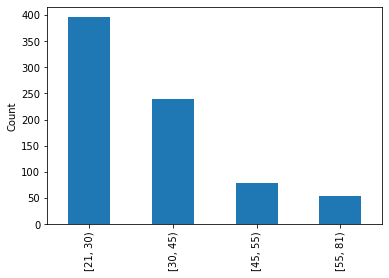

In [41]:
data['age_binned'].value_counts().plot.bar()
plt.ylabel('Count')
plt.show()

#### <font color = 'Green'>1.5 Natural Log Transformation

This transformation works well for right-skewed data and data with large outliers. After we log transform our data, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

In [62]:
credit = pd.read_excel('credit-data.xlsx')

In [63]:
credit.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


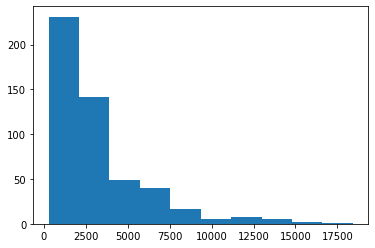

In [64]:
plt.hist(credit['Credit-Amount'])
plt.show()

In [65]:
credit_log = np.log(credit['Credit-Amount'])

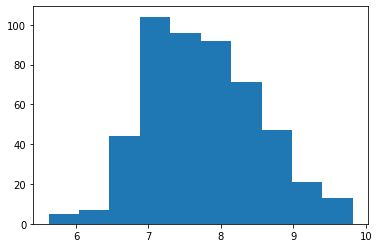

In [66]:
plt.hist(credit_log)
plt.show()

#### <font color = 'Green'>1.6 Square Root Transformation

This transformation will give a moderate effect on distribution. The main advantage of square root transformation is, it can be applied to zero values.

Here the each value in the selected numerical column will replace by its square root. It is weaker than the Log Transformation.

In [67]:
credit_amnt_sqrt = np.sqrt(credit['Credit-Amount'])

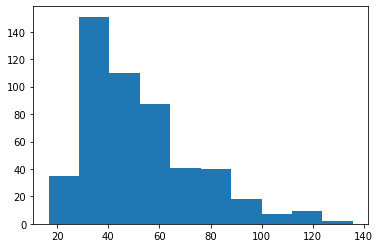

In [68]:
plt.hist(credit_amnt_sqrt)
plt.show()

#### <font color = 'Green'>1.7 Reciprocal Transformation

In [69]:
credit_amnt_reci = 1 / credit['Credit-Amount']

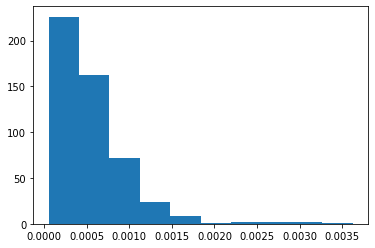

In [70]:
plt.hist(credit_amnt_reci)
plt.show()

#### <font color = 'Green'>1.8 Box Cox Transformation

In [71]:
from scipy.stats import boxcox

boxcox_crdamnt, lam = boxcox(credit['Credit-Amount'])

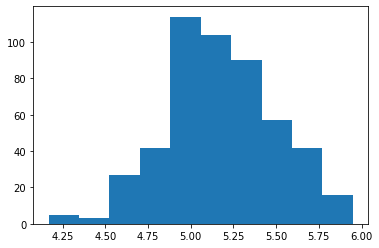

In [72]:
plt.hist(boxcox_crdamnt)
plt.show()

Here, we noticed that the Box-cox function reduced the skewness and it is almost equal to zero. 

For this transformation, values strictly needs to be positive.

#### <font color = 'Green'>1.9 Yeo-Johnson Transformation

This is one of the older transformation technique which is very similar to Box-cox transformation but does not require the values to be strictly positive.

This transformation is also having the ability to make the distribution more symmetric.

In [74]:
from scipy.stats import yeojohnson

yf_crdamnt, lam = yeojohnson(credit['Credit-Amount'])

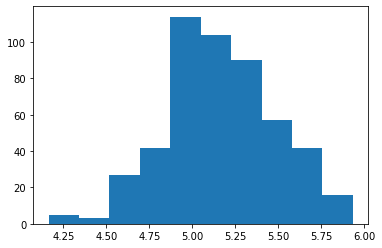

In [75]:
plt.hist(yf_crdamnt)
plt.show()

### <font color = 'Blue'>2. Encoding Categorical Variables

Categorical data is data that has more than one category. When working with that type of data we have two types, nominal and ordinal. Nominal data is data that has no particular order or hierarchy to it, and ordinal data is categorical data where the categories have order, but the differences between the categories are not important or unclear.

In [77]:
titanic = sns.load_dataset('titanic')

In [78]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### <font color = 'Green'>2.1 Ordinal Encoding</font>

Ordinal data is Categorical data that does have order and a hierarchy between its values.

In [79]:
class_dict = {'First': 3, 'Second':2, 'Third':1}

In [80]:
titanic['class'].map(class_dict)

0      1
1      3
2      1
3      3
4      1
      ..
886    2
887    3
888    1
889    3
890    1
Name: class, Length: 891, dtype: category
Categories (3, int64): [3, 2, 1]

In [86]:
titanic['class'].isnull().sum()  #No missing values in the data

0

**Note:** this method will not work if your feature has NaN values. Those need to be addressed prior to running .fit_transform.

In [91]:
from sklearn.preprocessing import OrdinalEncoder

# create encoder and set category order
encoder = OrdinalEncoder(categories=[['First', 'Second', 'Third']])

class_reshaped = np.array(titanic['class']).reshape(-1,1)

titanic['class_encoded']=encoder.fit_transform(class_reshaped)

#### 2.2 Label Encoding

Nominal Data (data which does not have order or priority ranking) is to be treated differently than Ordinal Data.

In [94]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       891 non-null    int64   
 1   pclass         891 non-null    int64   
 2   sex            891 non-null    object  
 3   age            714 non-null    float64 
 4   sibsp          891 non-null    int64   
 5   parch          891 non-null    int64   
 6   fare           891 non-null    float64 
 7   embarked       889 non-null    object  
 8   class          891 non-null    category
 9   who            891 non-null    object  
 10  adult_male     891 non-null    bool    
 11  deck           203 non-null    category
 12  embark_town    889 non-null    object  
 13  alive          891 non-null    object  
 14  alone          891 non-null    bool    
 15  class_encoded  891 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(4), object(5)
memory usage: 87.6+ KB


**Note:** We can transform this feature is by using sklearn.preprocessing and the LabelEncoder library. This method will not work if your feature has NaN values.

In [95]:
from sklearn.preprocessing import LabelEncoder

# create encoder
encoder = LabelEncoder()

# create new variable with assigned numbers
titanic['who'] = encoder.fit_transform(titanic['who'])

In [ ]:
#This is another way of doing same as above, but here we need to convert the column 
#into 'category' type first
titanic['who'] = titanic['who'].astype('category')

# save new version of category codes
titanic['who'] = titanic['who'].cat.codes

#### 2.3 One-Hot Encoding

One-hot encoding is when we create a dummy variable for each value of our categorical feature, and a dummy variable is defined as a numeric variable with two values: 1 and 0.

In [103]:
market = pd.read_csv('merged_data.csv')

In [104]:
# use pandas .get_dummies method to create one new column for each color
ohe = pd.get_dummies(market['Product_Category'], drop_first = True)

# join the new columns back onto our cars dataframe
market = market.join(ohe)

In [105]:
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub_Category,OFFICE SUPPLIES,TECHNOLOGY
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,AARON BERGMAN,ALBERTA,WEST,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",1,0
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",1,0
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",1,0
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,ALEKSANDRA GANNAWAY,SASKACHEWAN,PRARIE,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",1,0
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,ALLEN ARMOLD,NEW BRUNSWICK,ATLANTIC,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",1,0


#### 2.4 Binary Encoding

If we find the need to one-hot encode a lot of categorical features which would, in turn, create a sparse matrix and may cause problems for our model, a strong alternative to this issue is performing a `binary encoding`. A binary encoder will find the number of unique categories and then convert each category to its binary representation.

Number	Binary Number
1	      1
2	      10
3	      11
4	      100
5	      101
6	      110
7	      111
8	      1000
9	      1001
10	      1010

In [110]:
from category_encoders import BinaryEncoder

#this will create a new data frame with the embark_town column removed and replaced with our 3 new binary feature columns
BinaryEncoder(cols = ['embark_town'], drop_invariant = True).fit_transform(titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town_0,embark_town_1,embark_town_2,alive,alone,class_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,1,True,NaN,0,0,1,no,False,2.0
1,1,1,female,38.0,1,0,71.2833,C,First,2,False,C,0,1,0,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,2,False,NaN,0,0,1,yes,True,2.0
3,1,1,female,35.0,1,0,53.1000,S,First,2,False,C,0,0,1,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,1,True,NaN,0,0,1,no,True,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,1,True,NaN,0,0,1,no,True,1.0
887,1,1,female,19.0,0,0,30.0000,S,First,2,False,B,0,0,1,yes,True,0.0
888,0,3,female,NaN,1,2,23.4500,S,Third,2,False,NaN,0,0,1,no,False,2.0
889,1,1,male,26.0,0,0,30.0000,C,First,1,True,C,0,1,0,yes,True,0.0


In [109]:
bin_encoder = BinaryEncoder()

bin_encoder.fit_transform(titanic['embark_town'])

,embark_town_0,embark_town_1,embark_town_2
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,0,1,0


#### 2.5 Target Encoding

Target encoding is used to transform categorical features into hashed numerical values and is sometimes called the mean encoder. This encoder can be utilized for data sets that are being prepared for regression-based supervised learning, as it needs to take into consideration the mean of the target variable and its correlation between each individual category of our feature.

It replaces each color with a blend of the mean price of that car color and the mean price of all the cars.

In [ ]:
from category_encoders import TargetEncoder

# instantiate our encoder
encoder = TargetEncoder(cols = )

# set the results of our fit_transform to a variable 
# the output will be its own pandas series
encoder_results = encoder.fit_transform()

print(encoder_results.head())

#### 2.6 Encoding Date-Time Variables

In [114]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [118]:
taxis = sns.load_dataset('taxis')

In [119]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [120]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [123]:
taxis['pickup'] = pd.to_datetime(taxis['pickup'])

In [127]:
taxis['pickup']

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup, Length: 6433, dtype: datetime64[ns]

Syntax	                   Description & Output
df['col'].dt.year	        Outputs the year
df['col'].dt.day	        Outputs the day number
df['col'].dt.hour	        Outputs the hour from the time
df['col'].dt.minute	        Outputs the minute from the time
df['col'].dt.second	        Outputs the seconds from the time
df['col'].dt.week	        Outputs the week ordinal of the year
df['col'].dt.dayofweek	    Outputs the day of the week with Monday = 0 & Sunday = 6

In [132]:
taxis['pickup'].dt.minute

0       21
1       11
2       53
3       23
4       27
        ..
6428    51
6429    38
6430    55
6431     9
6432    31
Name: pickup, Length: 6433, dtype: int64